# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
from math import floor
import ast
import json
import re
import numpy as np

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [2]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "pvc_args_metrics_"

In [3]:
def get_workload(code):
    with open(path+"/"+code+"/queries.config",'r') as inp:
        workload_properties = ast.literal_eval(inp.read())
        return workload_properties


def get_performance_single(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    return df

def get_performance(evaluation):
    df = evaluation.get_df_benchmarking()
    df = df.sort_values(['experiment_run', 'client'])
    result = df.groupby('client').agg({
        'Goodput (requests/second)': 'sum',
        'num_errors': 'sum',
        'Latency Distribution.Average Latency (microseconds)': 'mean',
        'Latency Distribution.99th Percentile Latency (microseconds)': 'max',
    }).reset_index()
    return result

def get_performance_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_performance_all_single(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_performance_single(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_loading_time_max(evaluation):
    with open(path+"/"+evaluation.code+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
        pretty_connections = json.dumps(connections, indent=2)
        #print(pretty_connections)
        connections_sorted = sorted(connections, key=lambda c: c['name'])
        result = dict()
        for c in connections_sorted:
            result[c['name']] = {
                'time_load': c['timeLoad'],
                'time_ingest': c['timeIngesting'],
                'time_check': c['timeIndex'],
                'terminals': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS'],
                #'target': c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TARGET'],
                'pods': c['parameter']['parallelism'],
                'tenant': c['parameter']['TENANT'] if 'TENANT' in c['parameter'] else '',
                'client': c['parameter']['client'],
                'datadisk': c['hostsystem']['datadisk'],
            }
            #result[c['parameter']['connection_parameter']['loading_parameters']['BENCHBASE_TERMINALS']] = c['timeIngesting']
        df = pd.DataFrame(result).T
        return df#df['time_load'].max()

def get_loading_time_max_all(codes):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_loading_time_max(evaluation)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def show_summary_monitoring_table(evaluate, component):
    df_monitoring = list()
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util_s', component=component)
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    #df = df.T.max().sort_index() - df.T.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["CPU [CPUs]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_util', component=component)
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max CPU"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df).round(2)
    df_cleaned.columns = ["Max RAM [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='total_cpu_memory_cached', component=component)/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Max RAM Cached [Gb]"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_locks_count', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Locks"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_active', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Active"]
    if not df_cleaned.empty:
        df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Idle"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_activity_count_idle_transaction_aborted', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Transactions Aborted"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Hits"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_database_blks_read', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Block Reads"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_statio_user_tables_heap_blocks_hit', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Heap Reads"]
    #print(df_cleaned)
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_sync_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Sync Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='pg_stat_bgwriter_checkpoint_write_time_total', component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.max().sort_index() - df.min().sort_index() # compute difference of counter
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Write Time"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    ##########
    df = evaluate.get_monitoring_metric(metric='cache_hit_ratio', component=component)*100.
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    df = df.mean().sort_index()
    df_cleaned = pd.DataFrame(df)
    df_cleaned.columns = ["Cache Hit Ratio [%]"]
    #if not df_cleaned.empty:
    df_monitoring.append(df_cleaned.copy())
    return df_monitoring


def get_monitoring_timeseries_single(code, metric='pg_locks_count', component="stream"):
    evaluate = evaluators.benchbase(code=code, path=path)
    df = evaluate.get_monitoring_metric(metric=metric, component=component)#/1024
    #df = evaluate.get_loading_metrics('total_cpu_memory_cached')/1024
    #df = df.mean().sort_index()
    #df_cleaned = pd.DataFrame(df)
    #df_cleaned.columns = ["Locks"]
    return df#_cleaned


def get_monitoring_stream_single(evaluation):
    df_monitoring = show_summary_monitoring_table(evaluation, "stream")
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        return df

def get_monitoring(evaluation, type="stream"):
    df_monitoring = show_summary_monitoring_table(evaluation, type)
    if len(df_monitoring) > 0:
        #print("\n### Stream SUT")
        df = pd.concat(df_monitoring, axis=1).round(2)
        df = df.reindex(index=evaluators.natural_sort(df.index))
        # If your DataFrame is named df and the index is a string like 'PostgreSQL-1-1-1024-0-1'
        df = df.copy()  # avoid modifying original
        df['client'] = df.index.str.rsplit('-', n=1).str[-1]
        #print(df)
        result = df.groupby('client').agg({
            'CPU [CPUs]': 'sum',
            'Max RAM [Gb]': 'sum',
            'Max RAM Cached [Gb]': 'sum',
            'Max CPU': 'sum',
            'Locks': 'sum',
            'Active': 'sum',
            'Idle': 'sum',
            'Transactions Idle': 'sum',
            'Transactions Aborted': 'sum',
            'Block Hits': 'sum',
            'Block Reads': 'sum',
            'Heap Reads': 'sum',
            'Sync Time': 'sum',
            'Write Time': 'sum',
            'Cache Hit Ratio [%]': 'mean',
        }).reset_index()
        return result

def get_monitoring_stream(evaluation):
    return get_monitoring(evaluation, type="stream")

def get_monitoring_all(codes, type="stream"):
    df_performance = pd.DataFrame()
    for code in codes:
        evaluation = evaluators.benchbase(code=code, path=path)
        workload = get_workload(code)
        df = get_monitoring(evaluation, type)
        df['type']=workload['tenant_per']
        df['num_tenants']=workload['num_tenants']
        #print(df)
        df_performance = pd.concat([df_performance, df])
    return df_performance

def get_monitoring_stream_all(codes):
    return get_monitoring_all(codes, type="stream")


In [4]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [5]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [6]:
codes = [
    # container
    '1752307942', #tenants=1
    '1752269913', #tenants=2
    '1752275191', #tenants=3
    '1752280839', #tenants=4
    '1752301955', #tenants=5
    '1752313298', #tenants=6
    '1752330442', #tenants=7
    '1752350860', #tenants=8
    '1752344659', #tenants=9
    '1752322722', #tenants=10

    # database
    '1752306210', #tenants=1
    '1752267279', #tenants=2
    '1752273465', #tenants=3
    '1752279059', #tenants=4
    '1752284932', #tenants=5
    '1752311458', #tenants=6
    '1752328563', #tenants=7
    '1752335336', #tenants=8
    '1752342743', #tenants=9
    '1752320829', #tenants=10

    #schema
    '1752304481', #tenants=1
    '1752265563', #tenants=2
    '1752271740', #tenants=3
    '1752277284', #tenants=4
    '1752283144', #tenants=5
    '1752309639', #tenants=6
    '1752326695', #tenants=7
    '1752333444', #tenants=8
    '1752340336', #tenants=9
    '1752318904', #tenants=10
]

codes

['1752307942',
 '1752269913',
 '1752275191',
 '1752280839',
 '1752301955',
 '1752313298',
 '1752330442',
 '1752350860',
 '1752344659',
 '1752322722',
 '1752306210',
 '1752267279',
 '1752273465',
 '1752279059',
 '1752284932',
 '1752311458',
 '1752328563',
 '1752335336',
 '1752342743',
 '1752320829',
 '1752304481',
 '1752265563',
 '1752271740',
 '1752277284',
 '1752283144',
 '1752309639',
 '1752326695',
 '1752333444',
 '1752340336',
 '1752318904']

<Axes: >

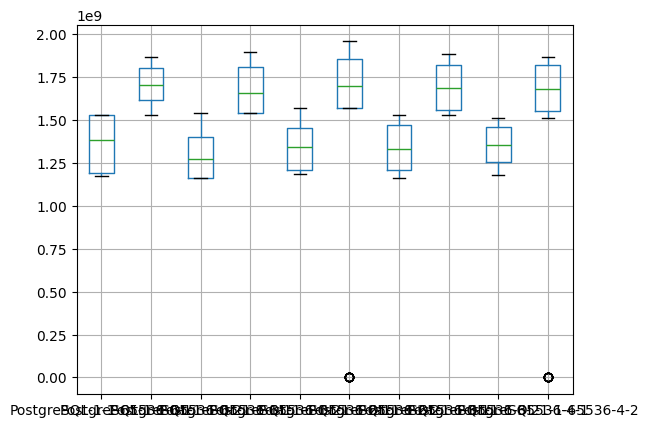

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[4]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

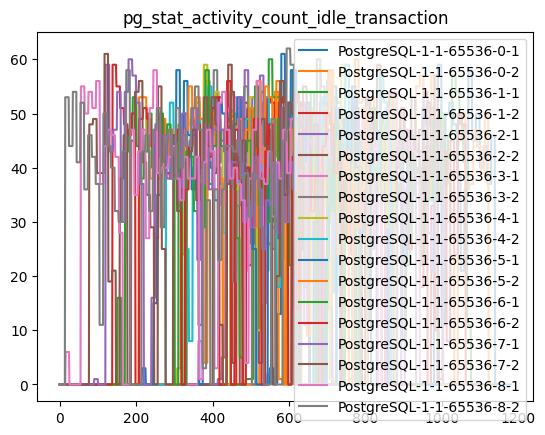

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[8]
df_monitoring = get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,Block Hits,Block Reads,Heap Reads,Sync Time,Write Time,Cache Hit Ratio [%],type,num_tenants
0,1,0.0,0.0,0.0,0.0,979.10,74.79,0.00,23.28,0.0,9.027970e+08,0.0,0.000000e+00,0.0,0.0,NaN,container,1
1,2,0.0,0.0,0.0,0.0,957.28,68.07,0.00,30.10,0.0,8.013700e+08,0.0,0.000000e+00,0.0,0.0,NaN,container,1
0,1,0.0,0.0,0.0,0.0,1838.19,134.76,0.00,48.89,0.0,1.325667e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,2
1,2,0.0,0.0,0.0,0.0,1875.06,134.67,0.00,51.60,0.0,3.574501e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,2
0,1,0.0,0.0,0.0,0.0,2597.70,183.75,0.00,76.42,0.0,1.571754e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,3
1,2,0.0,0.0,0.0,0.0,2413.03,176.35,0.00,72.26,0.0,3.152769e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,3
0,1,0.0,0.0,0.0,0.0,3139.52,243.47,0.00,69.51,0.0,2.440998e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,4
1,2,0.0,0.0,0.0,0.0,3110.08,226.43,0.00,102.07,0.0,2.996502e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,4
0,1,0.0,0.0,0.0,0.0,3975.79,270.04,0.00,112.32,0.0,1.810891e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,5
1,2,0.0,0.0,0.0,0.0,3410.35,241.00,0.00,112.91,0.0,4.870302e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,5


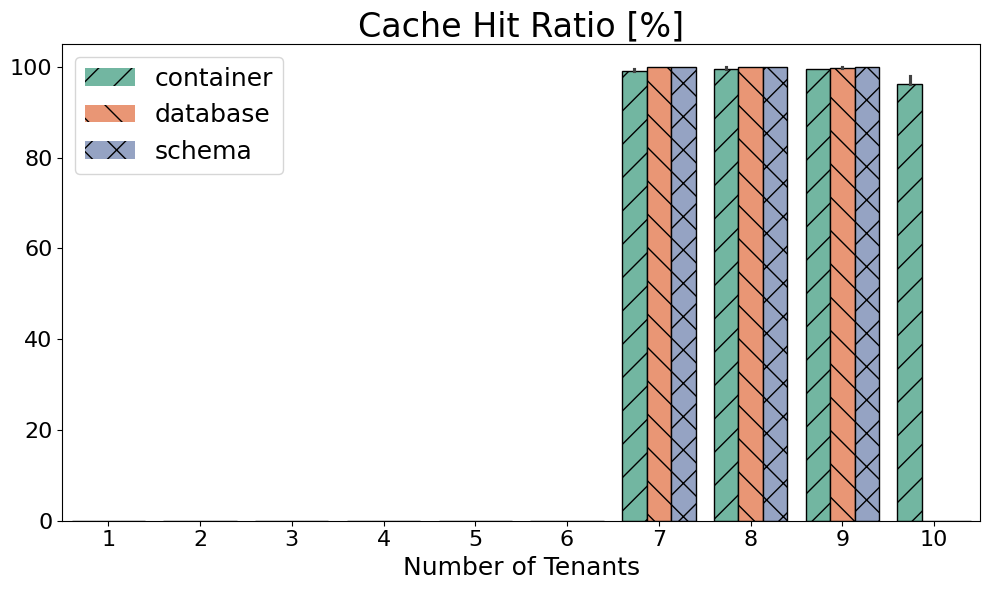

In [10]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

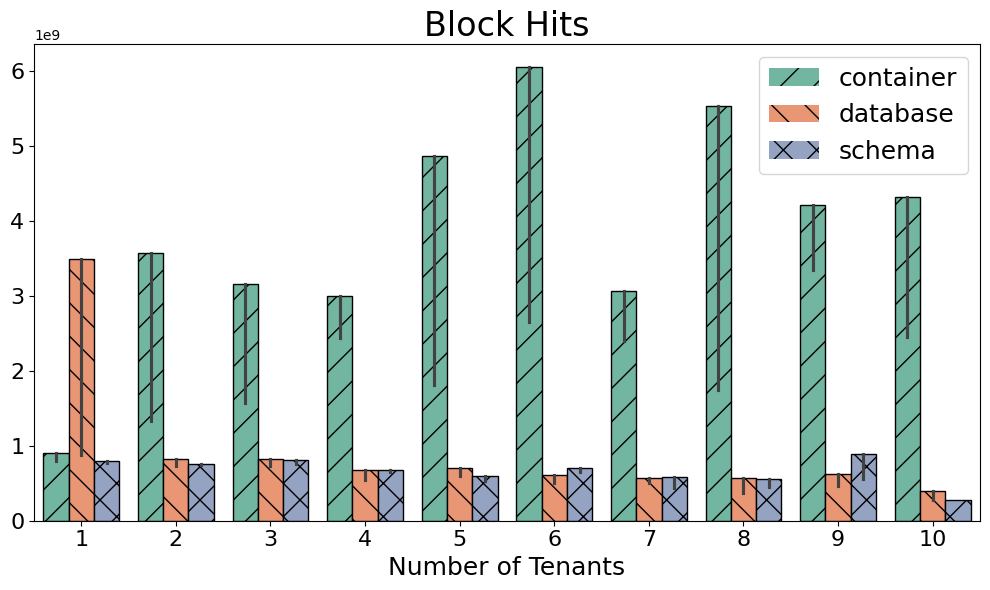

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

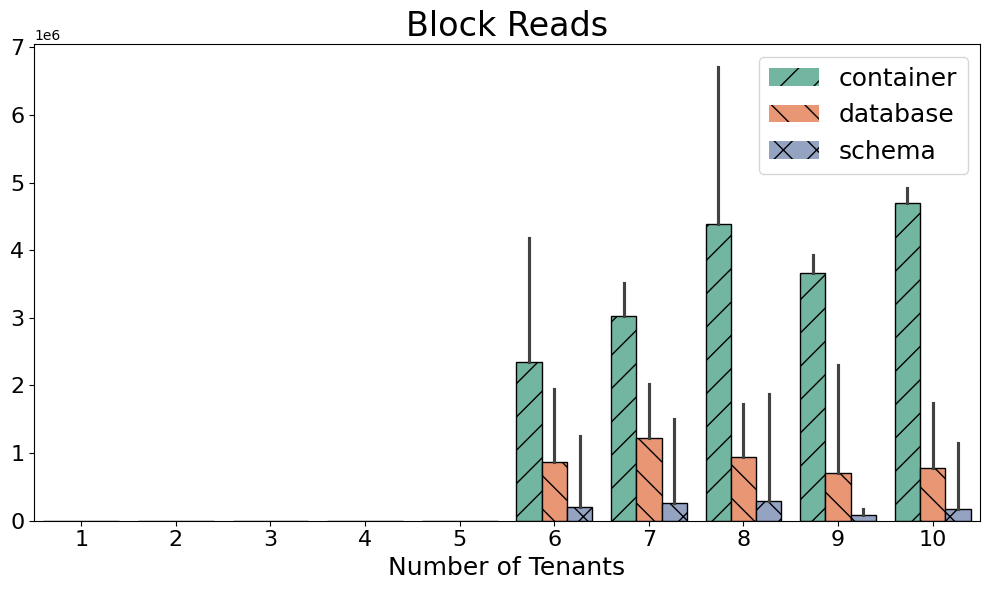

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='min')

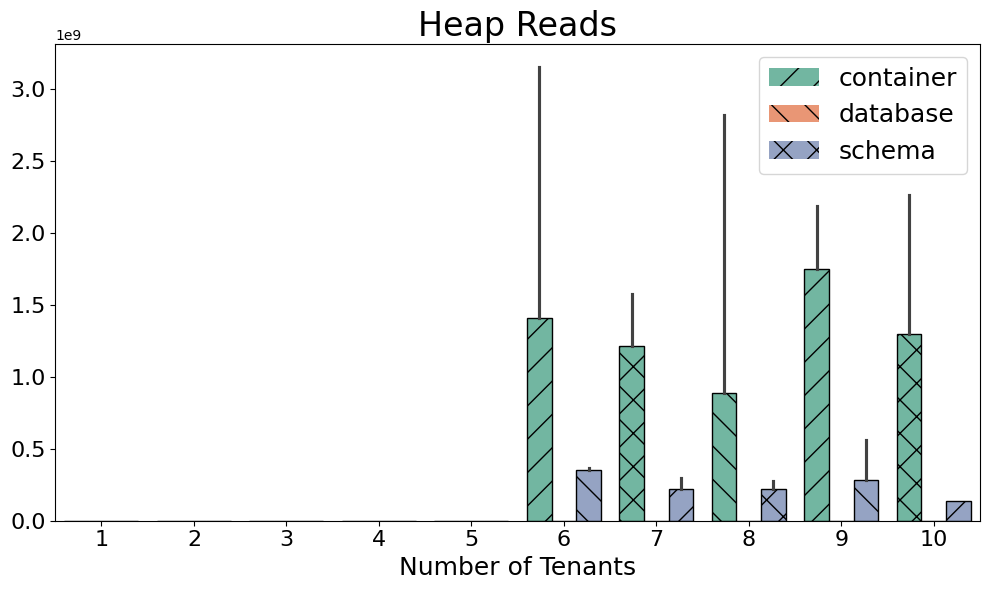

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='min')

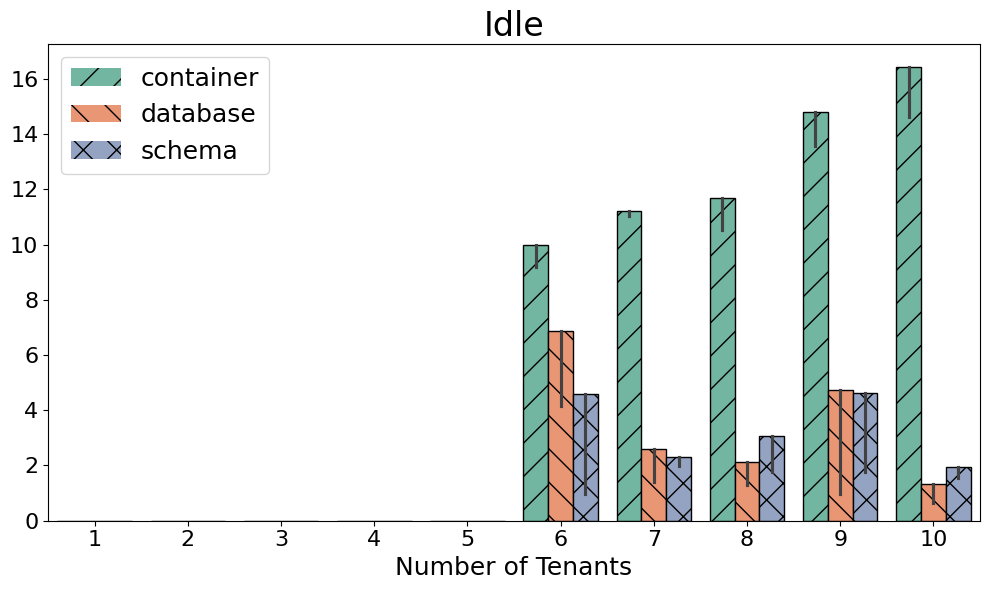

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

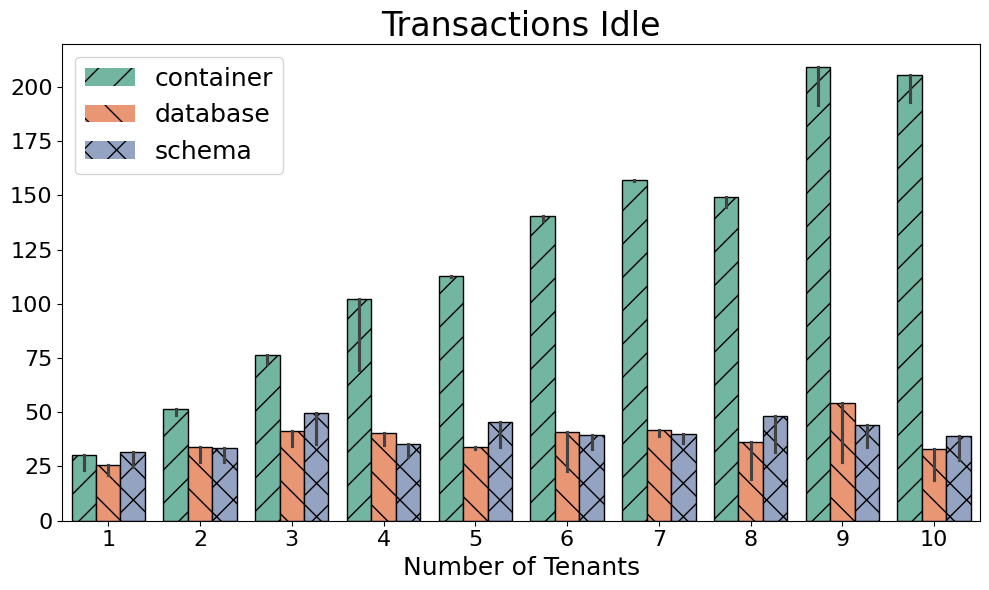

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

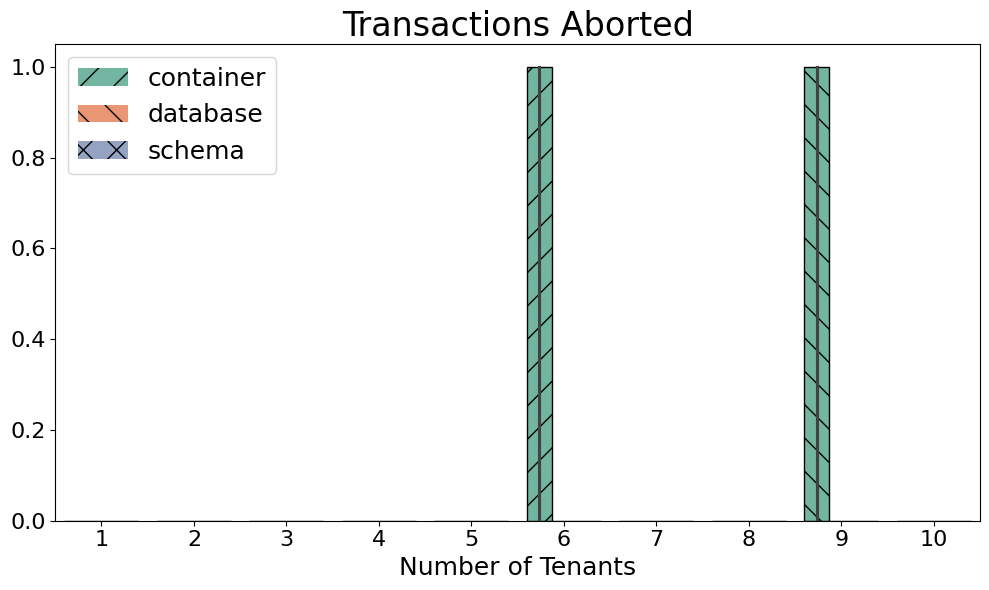

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

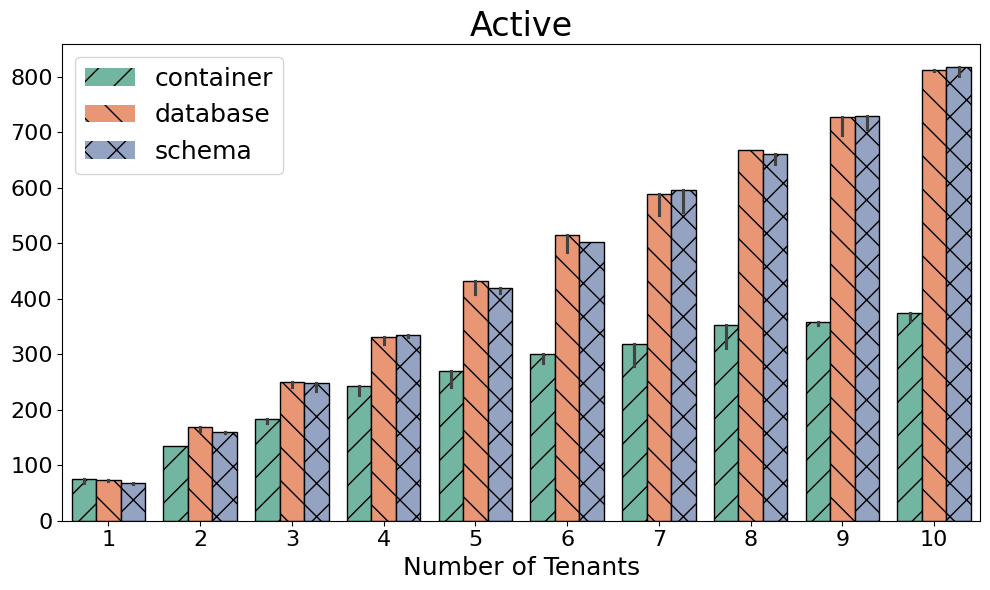

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

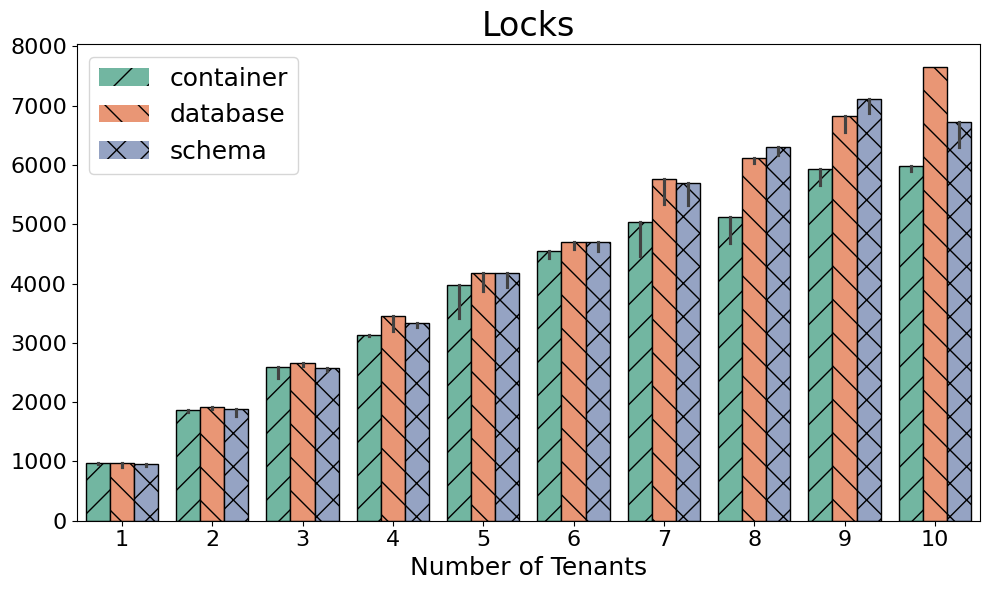

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

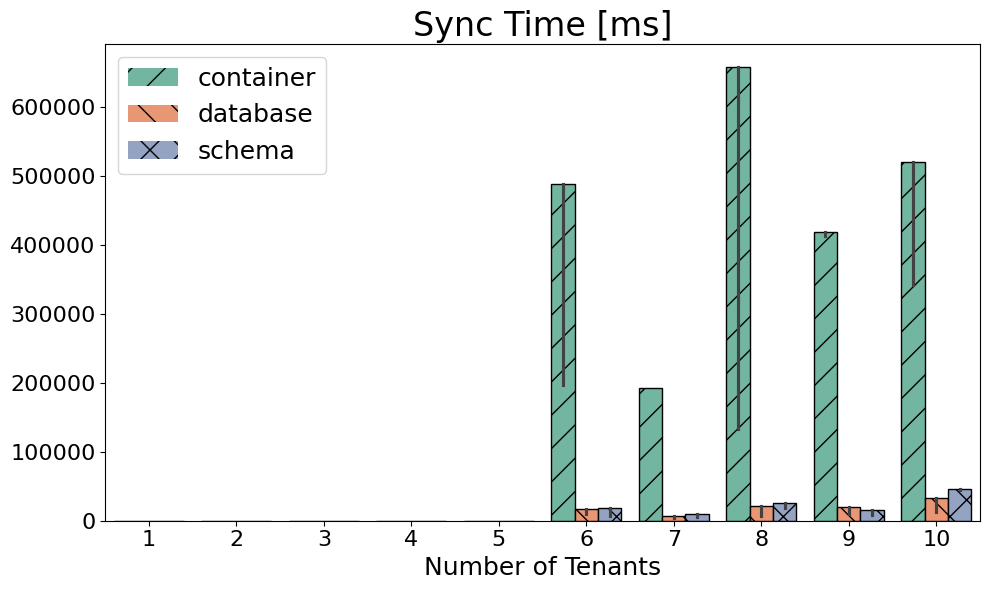

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

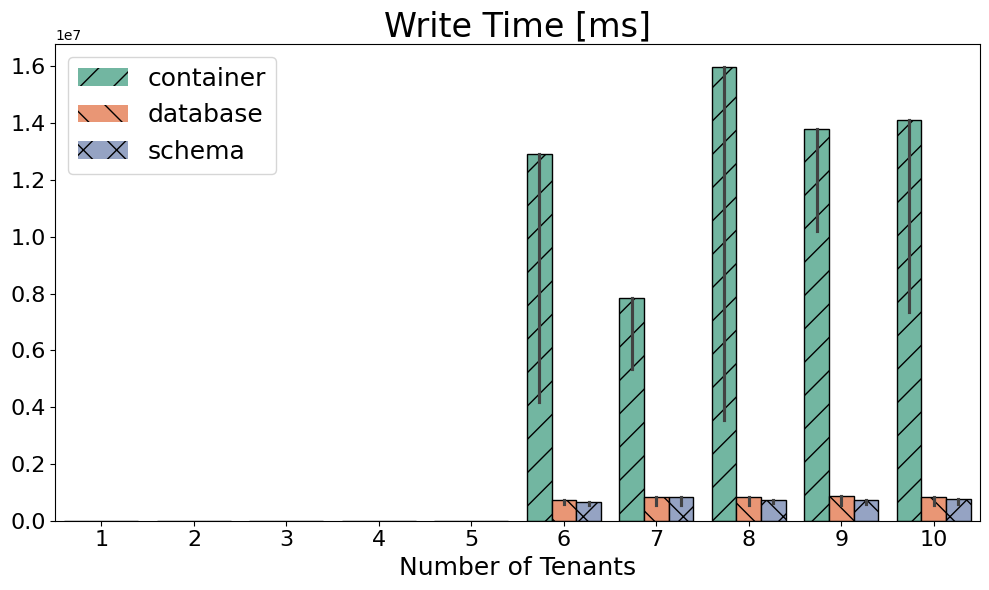

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

In [21]:
df_performance = get_performance_all_single(codes)
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,82j2p.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,10540958,12109,606,8108,29747,158539,18527,20255,container,1
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,tbfbp.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,4217443,14695,677,10000,29627,79968,20866,21180,container,1
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,9fgzb.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,12983381,13692,644,8890,36810,233647,22081,26111,container,2
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,nl99m.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,16444353,14854,634,9458,40989,216615,24194,27618,container,2
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,8blpz.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,7728993,13907,646,8998,38365,236563,22202,25656,container,2
PostgreSQL-1-1-65536-1-2-1,PostgreSQL-1-1-65536-1-2,PostgreSQL-1-1-65536-1,1,2,8jm2k.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3096560,14061,635,9138,37504,216480,22149,25169,container,2
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,tzthr.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,13547440,18754,724,11486,50381,315499,30271,33122,container,3
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,vcjq2.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,16978556,17909,695,11318,44153,171541,28029,29091,container,3
PostgreSQL-1-1-65536-2-1-1,PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,1,1,bqlqr.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,13010516,18838,691,11474,51442,342946,30564,34264,container,3


## Per Tenant

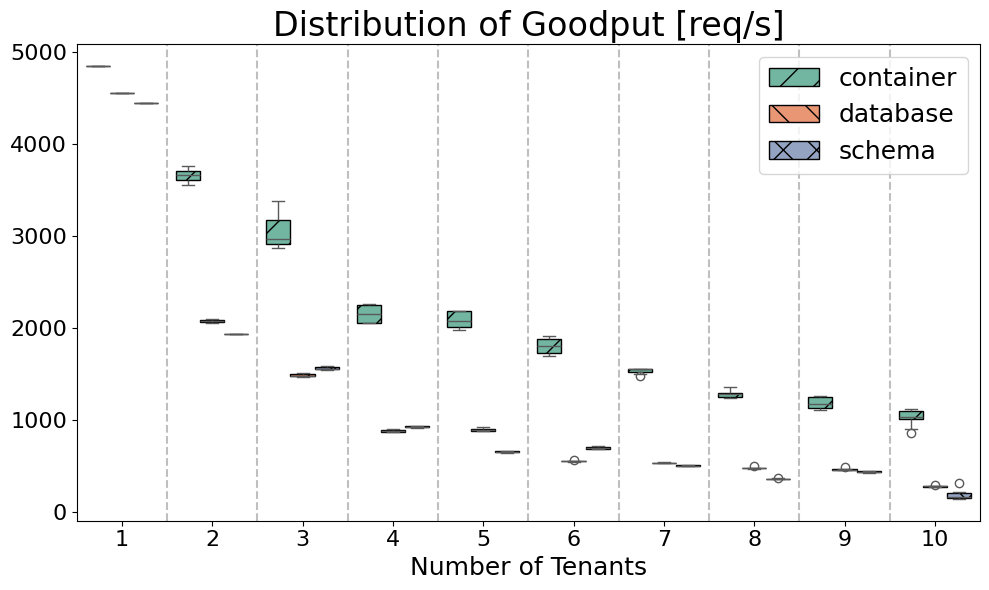

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

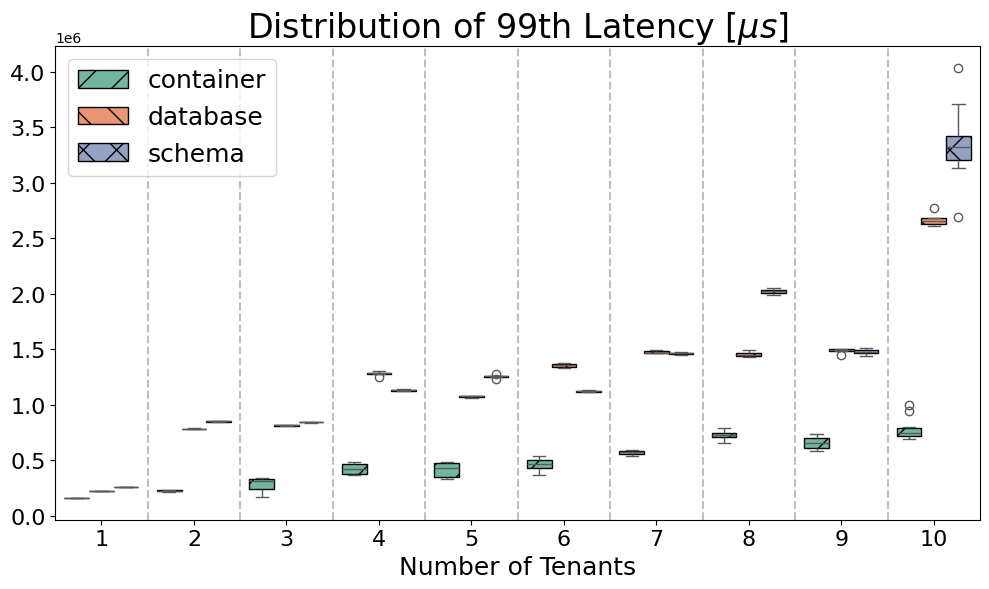

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [24]:
df_performance = get_performance_all(codes)
df_performance

,client,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants
0,1,4843.373120,104,20255.000000,158539,container,1
1,2,4635.686218,120,21180.000000,79968,container,1
0,1,7311.291368,184,26864.500000,233647,container,2
1,2,7727.066313,174,25412.500000,236563,container,2
0,1,9202.692813,237,32159.000000,342946,container,3
1,2,8216.817986,238,35907.000000,418816,container,3
0,1,8610.686231,216,45672.500000,481393,container,4
1,2,9703.634638,243,40516.750000,329358,container,4
0,1,10414.477798,277,47148.000000,481499,container,5
1,2,10679.011243,339,46031.600000,428884,container,5


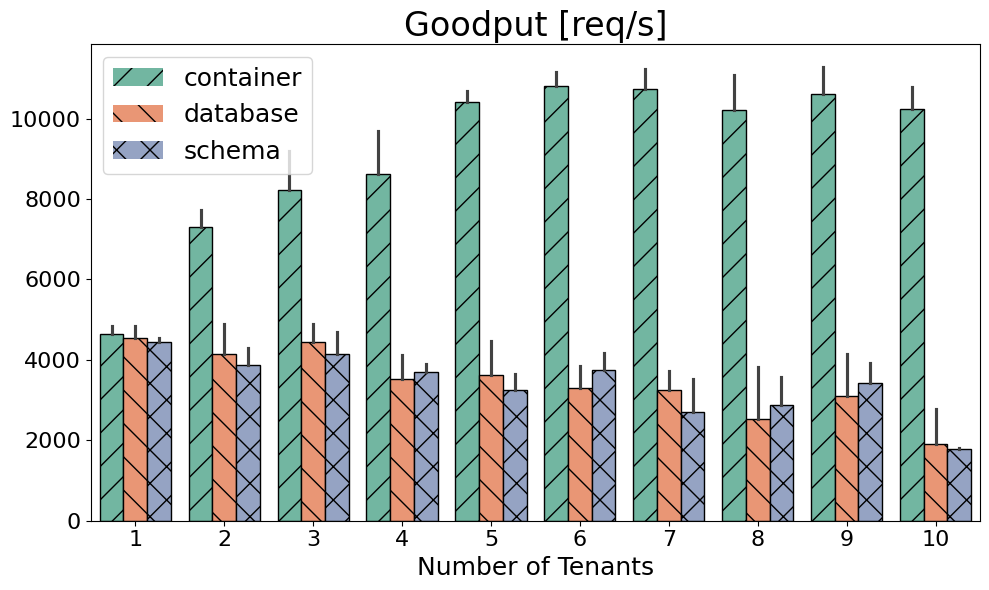

In [25]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

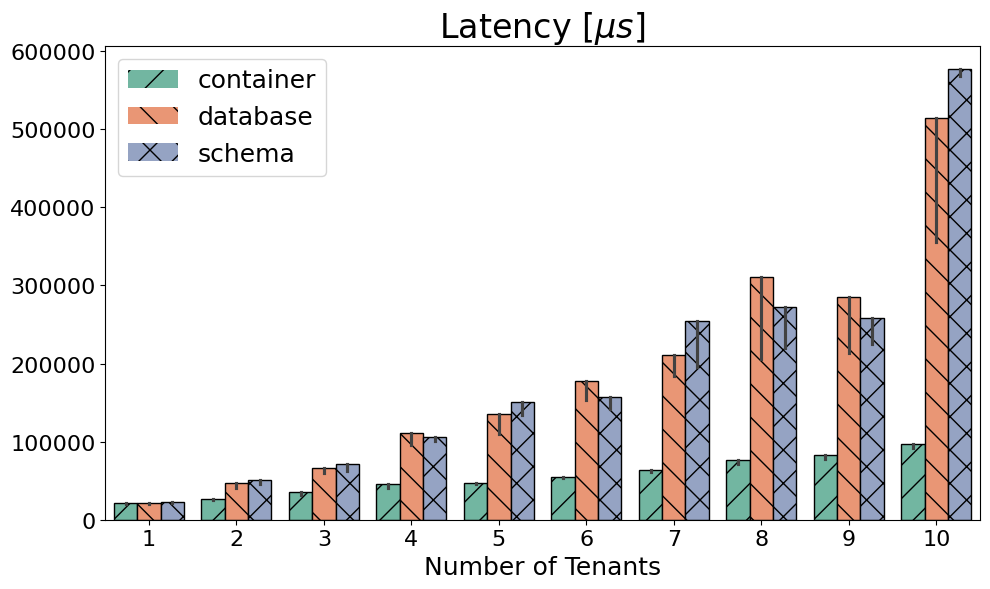

In [26]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

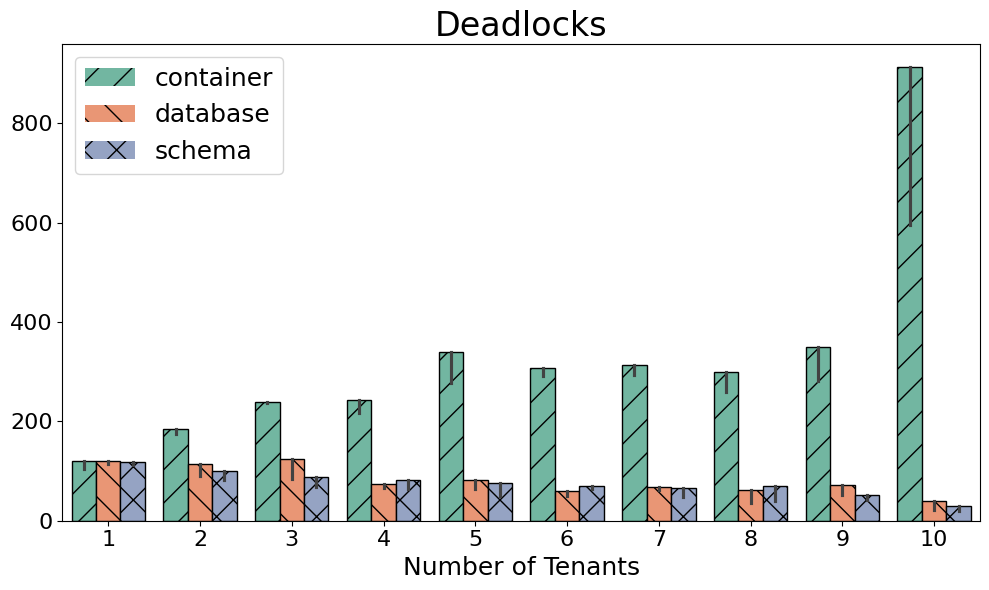

In [27]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [28]:
df_performance = get_loading_time_max_all(codes)
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-0-1,290.0,120.0,170.0,1,1,0,1,7643,container,1
PostgreSQL-1-1-65536-0-2,290.0,120.0,170.0,1,1,0,2,14327,container,1
PostgreSQL-1-1-65536-0-1,302.0,128.0,173.0,1,1,0,1,7256,container,2
PostgreSQL-1-1-65536-0-2,302.0,128.0,173.0,1,1,0,2,11949,container,2
PostgreSQL-1-1-65536-1-1,302.0,129.0,172.0,1,1,1,1,7256,container,2
PostgreSQL-1-1-65536-1-2,302.0,129.0,172.0,1,1,1,2,11325,container,2
PostgreSQL-1-1-65536-0-1,302.0,122.0,180.0,1,1,0,1,6279,container,3
PostgreSQL-1-1-65536-0-2,302.0,122.0,180.0,1,1,0,2,7862,container,3
PostgreSQL-1-1-65536-1-1,309.0,130.0,179.0,1,1,1,1,6340,container,3
PostgreSQL-1-1-65536-1-2,309.0,130.0,179.0,1,1,1,2,9632,container,3


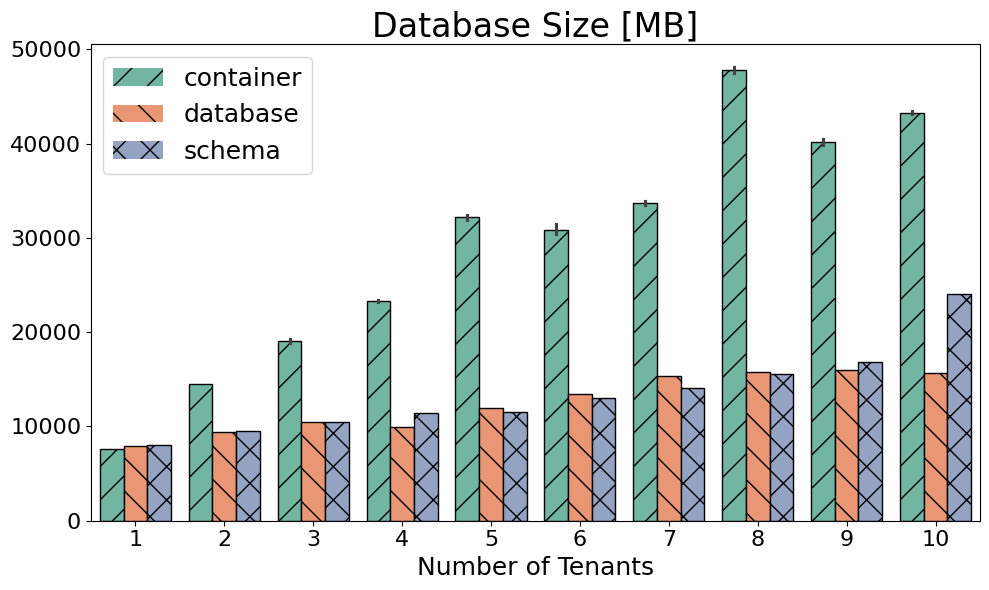

In [29]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

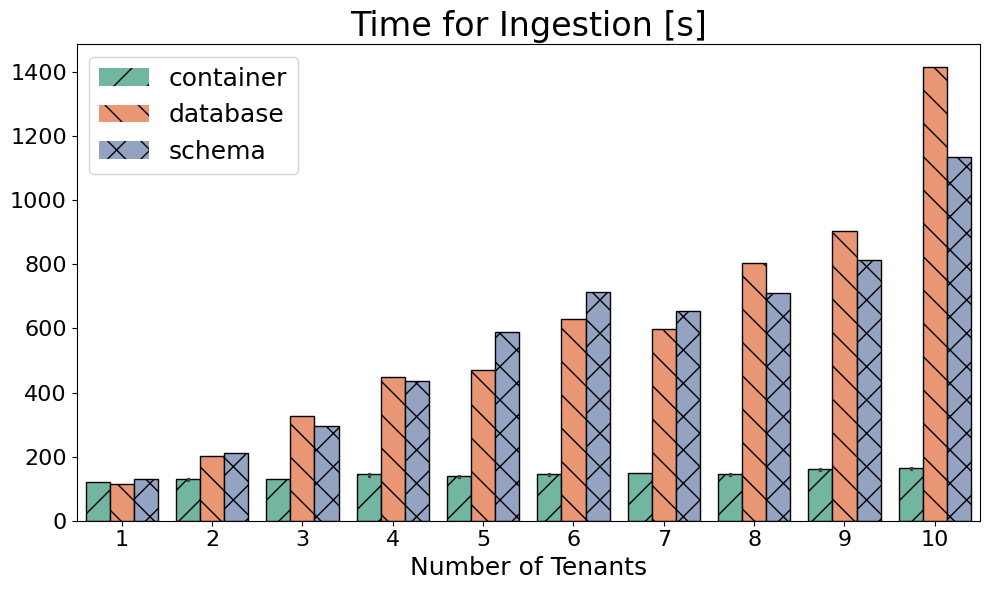

In [30]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

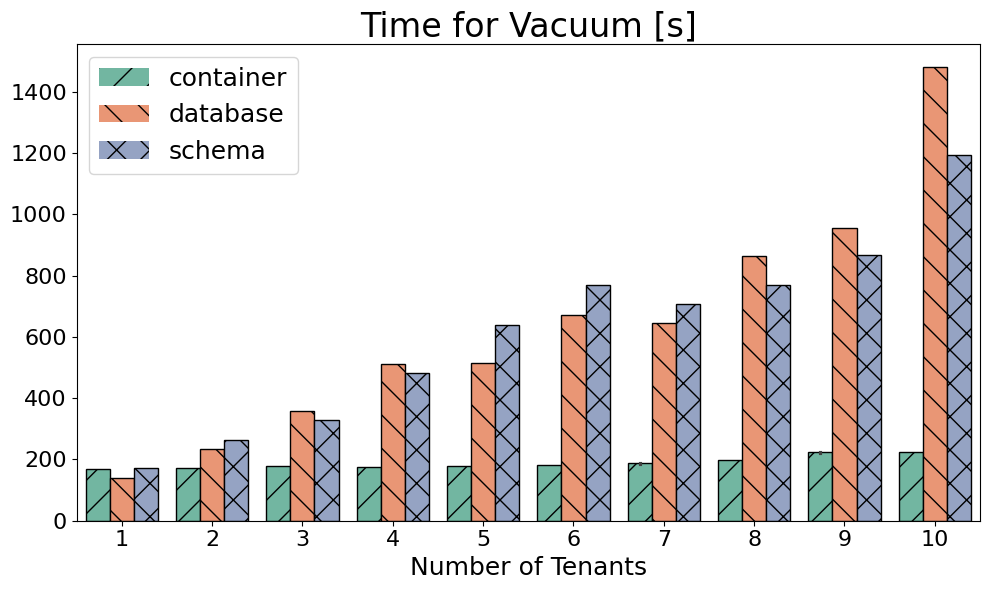

In [31]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [32]:
df_performance = get_monitoring_stream_all(codes)
df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,Block Hits,Block Reads,Heap Reads,Sync Time,Write Time,Cache Hit Ratio [%],type,num_tenants
0,1,0.0,0.0,0.0,0.0,979.10,74.79,0.00,23.28,0.0,9.027970e+08,0.0,0.000000e+00,0.0,0.0,NaN,container,1
0,1,0.0,0.0,0.0,0.0,1838.19,134.76,0.00,48.89,0.0,1.325667e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,2
0,1,0.0,0.0,0.0,0.0,2597.70,183.75,0.00,76.42,0.0,1.571754e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,3
0,1,0.0,0.0,0.0,0.0,3139.52,243.47,0.00,69.51,0.0,2.440998e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,4
0,1,0.0,0.0,0.0,0.0,3975.79,270.04,0.00,112.32,0.0,1.810891e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,5
0,1,0.0,0.0,0.0,0.0,4546.53,300.85,9.99,140.38,0.0,2.645798e+09,2354023.0,1.409325e+09,197468.0,4187442.0,NaN,container,6
0,1,0.0,0.0,0.0,0.0,5031.35,318.46,11.22,156.58,0.0,2.400402e+09,3517716.0,1.216041e+09,193104.0,5344046.0,99.062857,container,7
0,1,0.0,0.0,0.0,0.0,5119.31,353.42,11.69,144.59,0.0,1.742251e+09,4381112.0,8.895155e+08,132524.0,3545696.0,99.897500,container,8
0,1,0.0,0.0,0.0,0.0,5653.00,358.01,13.57,191.65,1.0,3.341443e+09,3929182.0,1.749223e+09,419150.0,10203234.0,99.493333,container,9
0,1,0.0,0.0,0.0,0.0,5904.95,374.55,14.63,192.84,0.0,2.444875e+09,4698331.0,1.297205e+09,341456.0,7350468.0,98.105000,container,10


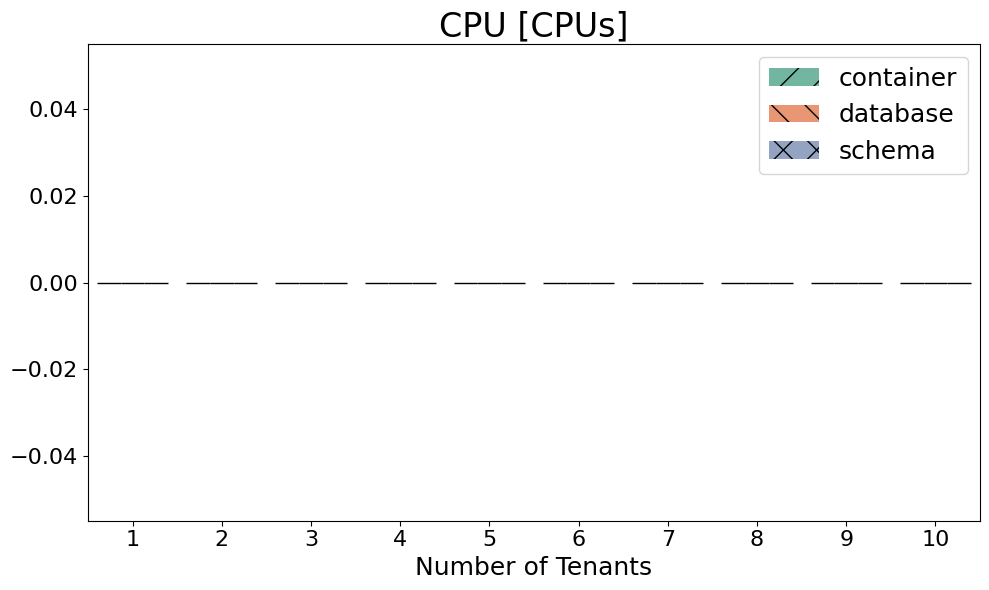

In [33]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

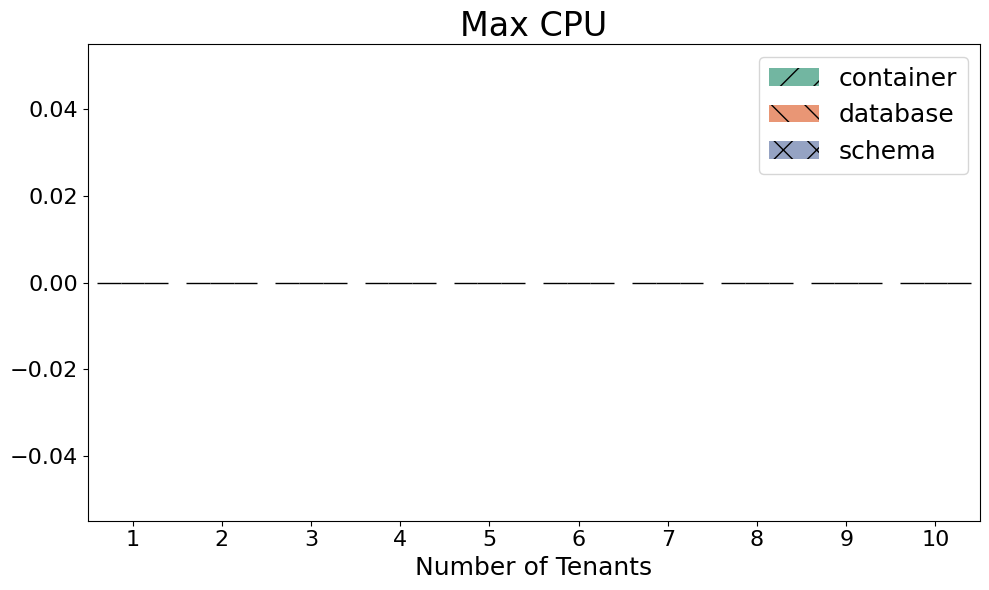

In [34]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

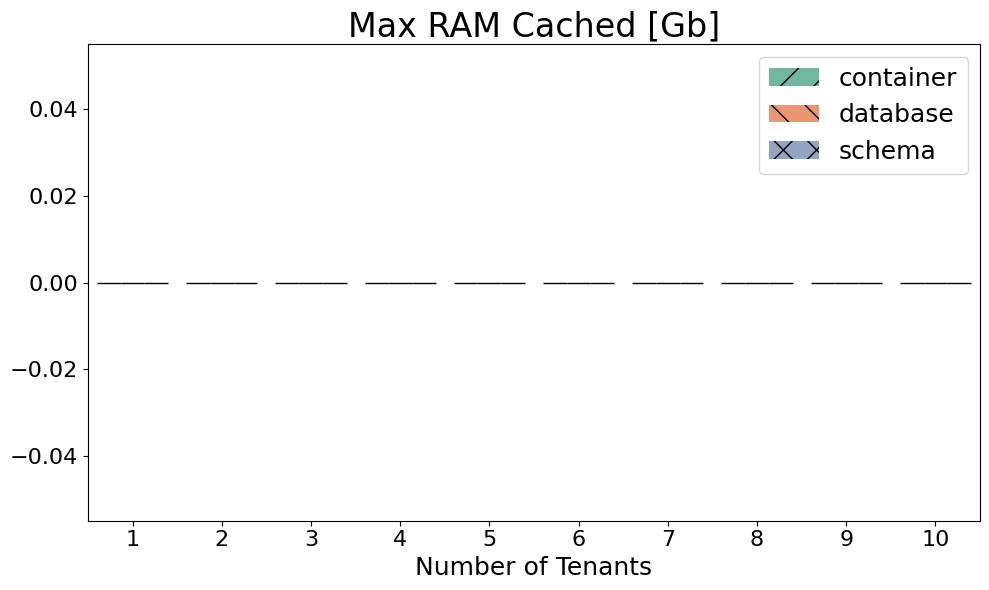

In [35]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [36]:
df_performance = get_monitoring_all(codes, "stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,Locks,Active,Idle,Transactions Idle,Transactions Aborted,Block Hits,Block Reads,Heap Reads,Sync Time,Write Time,Cache Hit Ratio [%],type,num_tenants
0,1,0.0,0.0,0.0,0.0,979.10,74.79,0.00,23.28,0.0,9.027970e+08,0.0,0.000000e+00,0.0,0.0,NaN,container,1
1,2,0.0,0.0,0.0,0.0,957.28,68.07,0.00,30.10,0.0,8.013700e+08,0.0,0.000000e+00,0.0,0.0,NaN,container,1
0,1,0.0,0.0,0.0,0.0,1838.19,134.76,0.00,48.89,0.0,1.325667e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,2
1,2,0.0,0.0,0.0,0.0,1875.06,134.67,0.00,51.60,0.0,3.574501e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,2
0,1,0.0,0.0,0.0,0.0,2597.70,183.75,0.00,76.42,0.0,1.571754e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,3
1,2,0.0,0.0,0.0,0.0,2413.03,176.35,0.00,72.26,0.0,3.152769e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,3
0,1,0.0,0.0,0.0,0.0,3139.52,243.47,0.00,69.51,0.0,2.440998e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,4
1,2,0.0,0.0,0.0,0.0,3110.08,226.43,0.00,102.07,0.0,2.996502e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,4
0,1,0.0,0.0,0.0,0.0,3975.79,270.04,0.00,112.32,0.0,1.810891e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,5
1,2,0.0,0.0,0.0,0.0,3410.35,241.00,0.00,112.91,0.0,4.870302e+09,0.0,0.000000e+00,0.0,0.0,NaN,container,5


In [37]:
#plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

In [38]:
#plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

In [39]:
#plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [40]:
client = '1'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Transactions Aborted,Block Hits,Block Reads,Heap Reads,Sync Time,Write Time,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,1,4843.373120,104,20255.000000,158539,container,1,1,0.0,0.0,...,0.0,9.027970e+08,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
1,1,7311.291368,184,26864.500000,233647,container,2,1,0.0,0.0,...,0.0,1.325667e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
2,1,9202.692813,237,32159.000000,342946,container,3,1,0.0,0.0,...,0.0,1.571754e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
3,1,8610.686231,216,45672.500000,481393,container,4,1,0.0,0.0,...,0.0,2.440998e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
4,1,10414.477798,277,47148.000000,481499,container,5,1,0.0,0.0,...,0.0,1.810891e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
5,1,10802.715933,292,54622.666667,536450,container,6,1,0.0,0.0,...,0.0,2.645798e+09,2354023.0,1.409325e+09,197468.0,4187442.0,NaN,inf,inf,inf
6,1,10724.952992,293,64066.142857,594547,container,7,1,0.0,0.0,...,0.0,2.400402e+09,3517716.0,1.216041e+09,193104.0,5344046.0,99.062857,inf,inf,inf
7,1,10220.849600,259,76761.125000,795520,container,8,1,0.0,0.0,...,0.0,1.742251e+09,4381112.0,8.895155e+08,132524.0,3545696.0,99.897500,inf,inf,inf
8,1,10623.667868,282,83243.777778,733579,container,9,1,0.0,0.0,...,1.0,3.341443e+09,3929182.0,1.749223e+09,419150.0,10203234.0,99.493333,inf,inf,inf
9,1,10235.017881,595,96388.100000,998237,container,10,1,0.0,0.0,...,0.0,2.444875e+09,4698331.0,1.297205e+09,341456.0,7350468.0,98.105000,inf,inf,inf


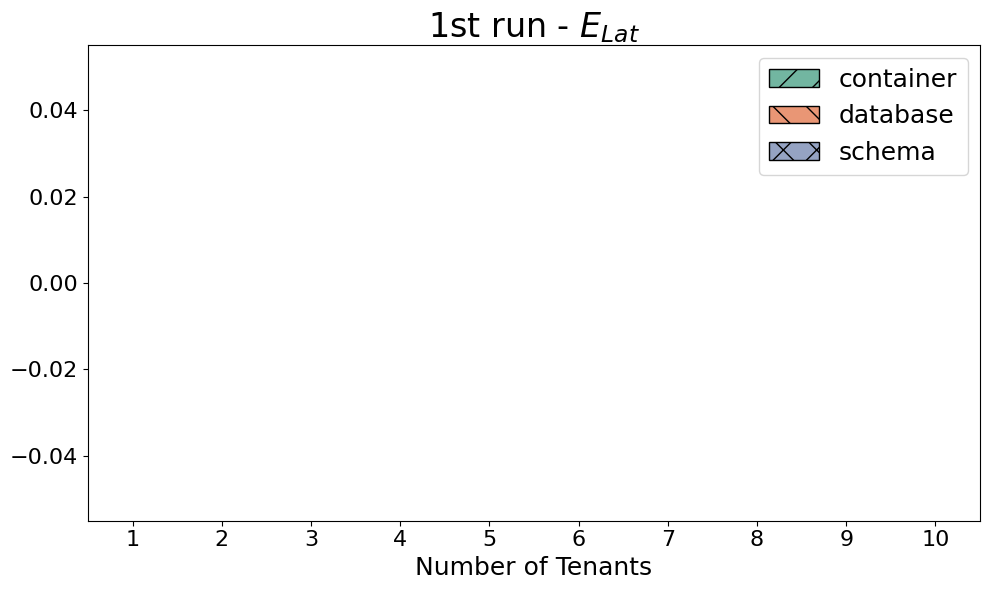

In [41]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [42]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

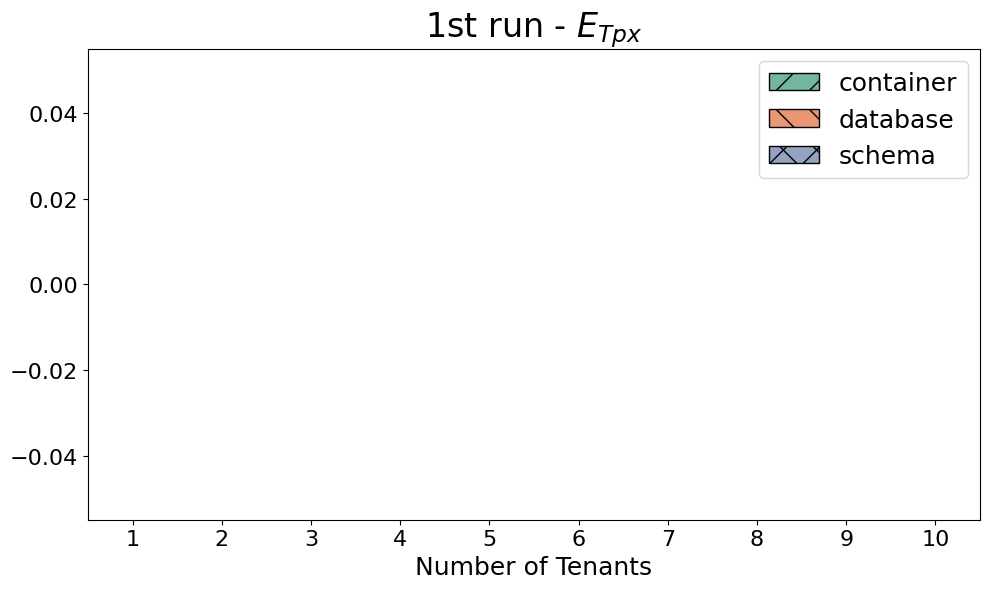

In [43]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

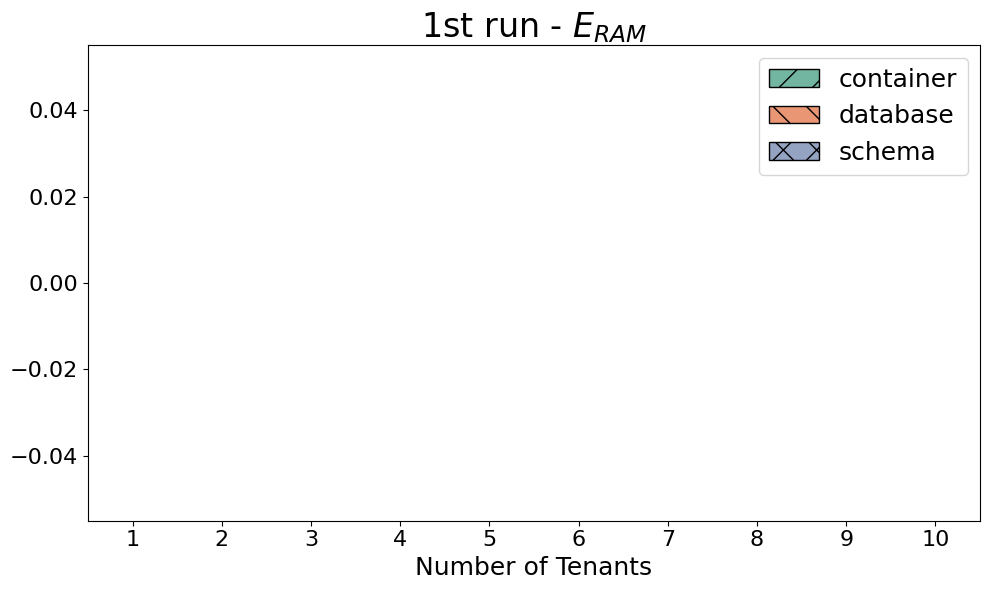

In [44]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [45]:
client = '2'

df_performance_monitoring = get_monitoring_stream_all(codes)
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = get_performance_all(codes)
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Transactions Aborted,Block Hits,Block Reads,Heap Reads,Sync Time,Write Time,Cache Hit Ratio [%],E_Tpx,E_Lat,E_RAM
0,2,4635.686218,120,21180.000000,79968,container,1,2,0.0,0.0,...,0.0,8.013700e+08,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
1,2,7727.066313,174,25412.500000,236563,container,2,2,0.0,0.0,...,0.0,3.574501e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
2,2,8216.817986,238,35907.000000,418816,container,3,2,0.0,0.0,...,0.0,3.152769e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
3,2,9703.634638,243,40516.750000,329358,container,4,2,0.0,0.0,...,0.0,2.996502e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
4,2,10679.011243,339,46031.600000,428884,container,5,2,0.0,0.0,...,0.0,4.870302e+09,0.0,0.000000e+00,0.0,0.0,NaN,inf,inf,inf
5,2,11156.058037,307,52795.833333,481290,container,6,2,0.0,0.0,...,1.0,6.051040e+09,4185294.0,3.150962e+09,488626.0,12928984.0,NaN,inf,inf,inf
6,2,11237.987998,313,61169.857143,542367,container,7,2,0.0,0.0,...,0.0,3.062596e+09,3023245.0,1.578044e+09,193179.0,7828523.0,99.618571,inf,inf,inf
7,2,11079.052727,300,70966.750000,699440,container,8,2,0.0,0.0,...,0.0,5.537462e+09,6708894.0,2.820869e+09,658460.0,15975137.0,99.568750,inf,inf,inf
8,2,11283.071091,349,78337.333333,681197,container,9,2,0.0,0.0,...,0.0,4.213447e+09,3663768.0,2.184651e+09,413557.0,13779040.0,99.448889,inf,inf,inf
9,2,10795.016110,913,91428.300000,1073431,container,10,2,0.0,0.0,...,0.0,4.319893e+09,4921847.0,2.262370e+09,521338.0,14121205.0,96.267000,inf,inf,inf


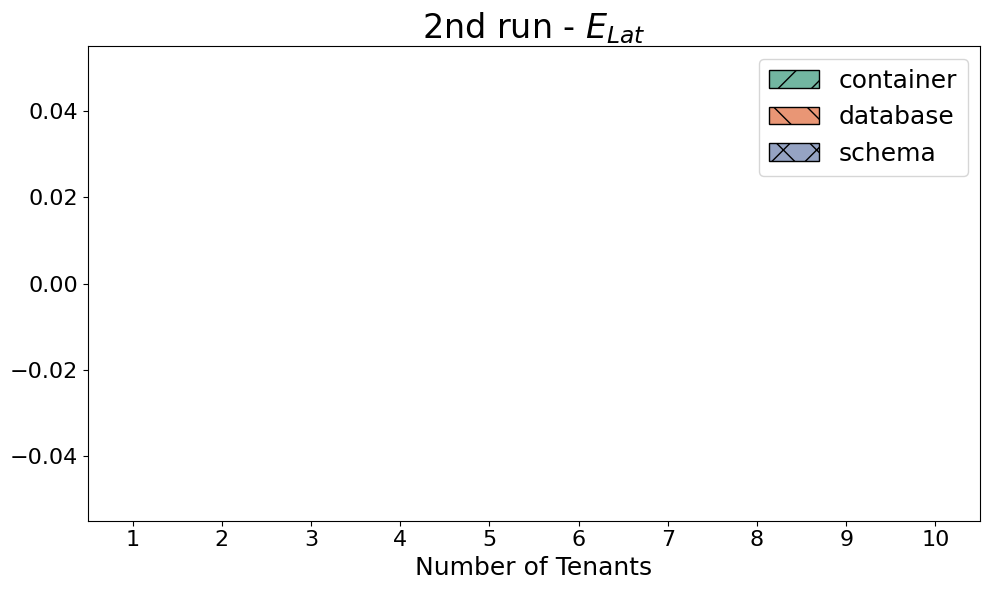

In [46]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

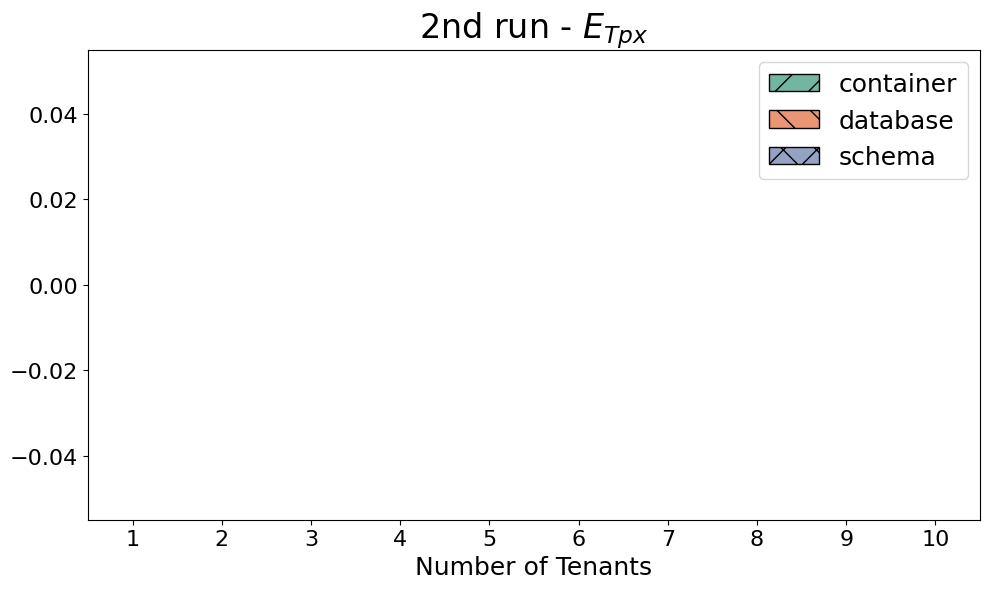

In [47]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

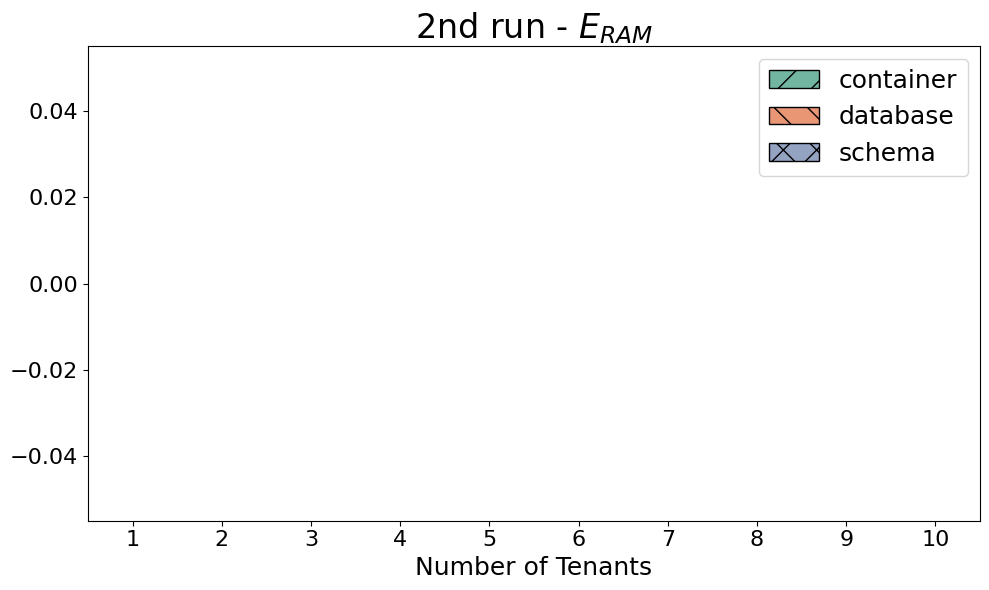

In [48]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [49]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [50]:
#zip_all_results()